<a href="https://www.kaggle.com/code/kashish2407/who-will-survive-titanic-data-unveiled1?scriptVersionId=213793294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background: #640D5F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.5; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">🗒️OUTLINES OF THE NOTEBOOK🗒️</div>

<div style="font-size: 18px; font-family: Verdana; border: 2px solid #ccc; background-color: #F5F5F5; padding: 10px; border-radius: 10px; margin-bottom: 20px; position: relative;"><centre>

  <!-- Add the image inside the div, aligned to the right-center -->
 

  <span style="color: #640D5F; font-weight: bold;">What’s Inside? Let’s Dive In! </span><centre>
  <ol>
    <li><a href="#1">Introduction</a></li>
    <li><a href="#2">Data Understanding </a></li>
    <li><a href="#3">Data Preprocessing</a></li>
    <li><a href="#4">Statistical Analysis </a></li>
    <li><a href="#5">Exploratory Data Analysis</a></li>
    <li><a href="#6">Train Test Split</a></li>
    <li><a href="#7">Model Training </a></li>
    <li><a href="#8">Evaluation </a></li>
    <li><a href="#9">Submission</a></li>
    <li><a href="#10">Conclusion </a></li>
    <li><a href="#11">Author Message </a></li>
  </ol>
</div>


<a id="1"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">1. Introduction</div>

<span style="font-size: 15px; font-family: Verdana; border: 2px solid #ccc;; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
<strong>On April 15, 1912, the RMS Titanic tragically sank after colliding with an iceberg, leading to the loss of over 1,500 lives. This disaster remains one of the most infamous maritime tragedies in history. Among the chaos, survival was not random—factors such as gender, age, and class played a crucial role in determining who made it to safety.
</strong>
<br>
<br>
<strong>The goal of this notebook is to predict which passengers aboard the Titanic survived based on their characteristics.This notebook aims to:<strong>
<br>
<br>  ▶️Analyze the Titanic dataset and uncover patterns related to survival.
<br>  ▶️Apply machine learning techniques to predict passenger survival.
<br>  ▶️Evaluate model performance and draw meaningful insights.
<br>
<br>The dataset includes information such as gender, age, class, and more, which we'll explore to determine their impact on survival.
</span>


<a id="2"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);"> 2.Data Understanding</div>

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Import Neccessary File</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


import os 
import joblib
import warnings 
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier






## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Load Data</div>

In [2]:
train_df= pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Explore the Data</div>

<div style="background-color: #f8f1ff; border: 2px solid #e0b3ff; padding: 20px; border-radius: 10px;">
    <h2 style="color: #a64dff; text-align: center;">✨ Understand the Features ✨</h2>
    <p style="color: #b347b8; font-size: 16px; font-weight: bold;">The Titanic dataset includes the following key features:</p>
    <ul style="color: #800080; font-size: 15px; line-height: 1.8;">
        <li><strong>PassengerId</strong>: Unique identifier for each passenger.</li>
        <li><strong>Survived</strong>: Target variable (1 = Survived, 0 = Did Not Survive).</li>
        <li><strong>Pclass</strong>: Ticket class (1 = First, 2 = Second, 3 = Third).</li>
        <li><strong>Name</strong>: Full name of the passenger.</li>
        <li><strong>Sex</strong>: Gender of the passenger.</li>
        <li><strong>Age</strong>: Age of the passenger (in years).</li>
        <li><strong>SibSp</strong>: Number of siblings or spouses aboard.</li>
        <li><strong>Parch</strong>: Number of parents or children aboard.</li>
        <li><strong>Ticket</strong>: Ticket number.</li>
        <li><strong>Fare</strong>: Amount paid for the ticket.</li>
        <li><strong>Cabin</strong>: Cabin number (if assigned).</li>
        <li><strong>Embarked</strong>: Port of embarkation:
            <ul>
                <li><strong>C</strong>: Cherbourg</li>
                <li><strong>Q</strong>: Queenstown</li>
                <li><strong>S</strong>: Southampton</li>
            </ul>
        </li>
    </ul>
</div>


In [5]:
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [6]:
print(f"The Shape of Dataset is : {train_df.shape} ")

The Shape of Dataset is : (891, 9) 


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
None


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Check for Missing and Duplicate Data</div>

In [9]:
train_df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

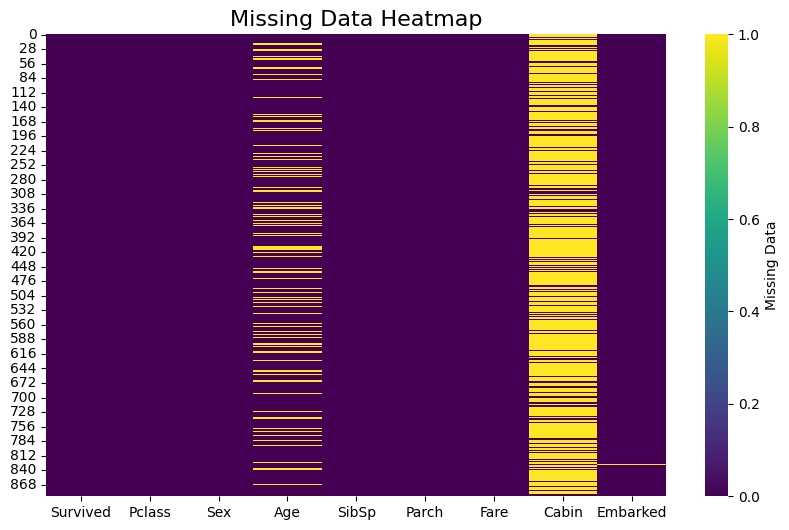

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(),cbar=True,    cbar_kws={'label': 'Missing Data'},  cmap= 'viridis')
plt.title("Missing Data Heatmap", fontsize=16)
plt.show()

In [11]:
train_df.duplicated().sum()

107

<a id="3"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">3. Data Preprocessing</div>

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Handling Missings👈</div>

In [12]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Embarked'] = test_df['Embarked'].fillna('S')
train_df.drop('Cabin', axis =1, inplace= True)
test_df.drop("Cabin",axis=1, inplace = True)
test_df.dropna()
train_df.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


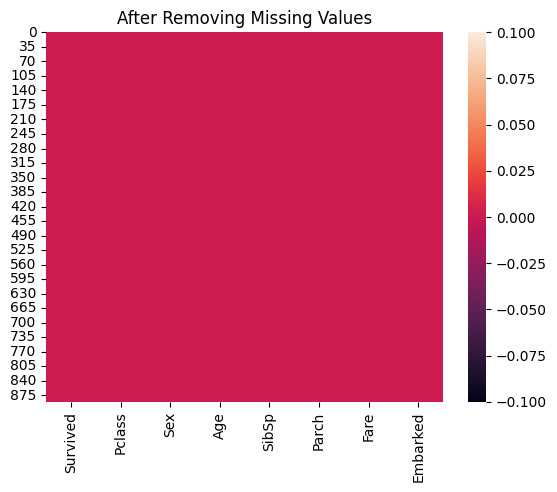

In [13]:
sns.heatmap(train_df.isnull())
plt.title("After Removing Missing Values")
plt.show()

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Feature Scaling & Encoding👈</div>

In [14]:
scaler = StandardScaler()
train_df[['Age', 'Fare']]= scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']]= scaler.fit_transform(test_df[['Age', 'Fare']])


In [15]:
le=LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])


In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean
test_df.iloc[:, 1:] = imputer.fit_transform(test_df.iloc[:, 1:])


In [17]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,2
1,1,1,0,0.638789,1,0,0.786845,0
2,1,3,0,-0.284663,0,0,-0.488854,2
3,1,1,0,0.407926,1,0,0.420730,2
4,0,3,1,0.407926,0,0,-0.486337,2
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.207709,0,0,-0.386671,2
887,1,1,0,-0.823344,0,0,-0.044381,2
888,0,3,0,0.000000,1,2,-0.176263,2
889,1,1,1,-0.284663,0,0,-0.044381,0


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Categorical and Numerical Column split</div>

In [18]:
num_col = train_df.select_dtypes(include=['number']).columns.tolist()
cat_col = train_df.select_dtypes(include=['object']).columns.tolist()

cat_col.extend([col for col in num_col if train_df[col].nunique() < 10])
cat_col.remove('Survived')
num_col = [col for col in num_col if col not in cat_col]

print("Categorical Columns:", cat_col)
print("Numerical Columns:", num_col)


Categorical Columns: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Numerical Columns: ['Survived', 'Age', 'Fare']


In [19]:
cat_data = train_df[cat_col]
num_data = train_df[num_col]

In [20]:
print(f"The Catgorical Columns are : {cat_col} ")
print('🟪'*30)  

print(f"The Numerical Columns are : {num_col} ")

The Catgorical Columns are : ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] 
🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪
The Numerical Columns are : ['Survived', 'Age', 'Fare'] 


In [21]:
print(num_data.describe())
print('🟪'*30)  
print(cat_data.describe())

         Survived           Age          Fare
count  891.000000  8.910000e+02  8.910000e+02
mean     0.383838  2.232906e-16  3.987333e-18
std      0.486592  1.000562e+00  1.000562e+00
min      0.000000 -2.253155e+00 -6.484217e-01
25%      0.000000 -5.924806e-01 -4.891482e-01
50%      0.000000  0.000000e+00 -3.573909e-01
75%      1.000000  4.079260e-01 -2.424635e-02
max      1.000000  3.870872e+00  9.667167e+00
🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪
           Pclass         Sex       SibSp       Parch    Embarked
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642    0.647587    0.523008    0.381594    1.536476
std      0.836071    0.477990    1.102743    0.806057    0.791503
min      1.000000    0.000000    0.000000    0.000000    0.000000
25%      2.000000    0.000000    0.000000    0.000000    1.000000
50%      3.000000    1.000000    0.000000    0.000000    2.000000
75%      3.000000    1.000000    1.000000    0.000000    2.000000
max      3.000000    1.0000

<a id="4"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">4. Statistical Analysis</div>

In [22]:
for c  in cat_col:
    col_cnt= train_df[c].nunique()
    print(f"{c} has {col_cnt} unique values .")
    print('〰️'*20)


Pclass has 3 unique values .
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Sex has 2 unique values .
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
SibSp has 7 unique values .
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Parch has 7 unique values .
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Embarked has 3 unique values .
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️


In [23]:
for c  in cat_col:
    print(f"Value Count for {c} .")
    print(train_df[c].value_counts())
    print('〰️'*20)

Value Count for Pclass .
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Value Count for Sex .
Sex
1    577
0    314
Name: count, dtype: int64
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Value Count for SibSp .
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Value Count for Parch .
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️
Value Count for Embarked .
Embarked
2    646
0    168
1     77
Name: count, dtype: int64
〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️〰️


<a id="5"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">5. Exploratory Data Analysis</div>

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Univariate Analysis👈</div>

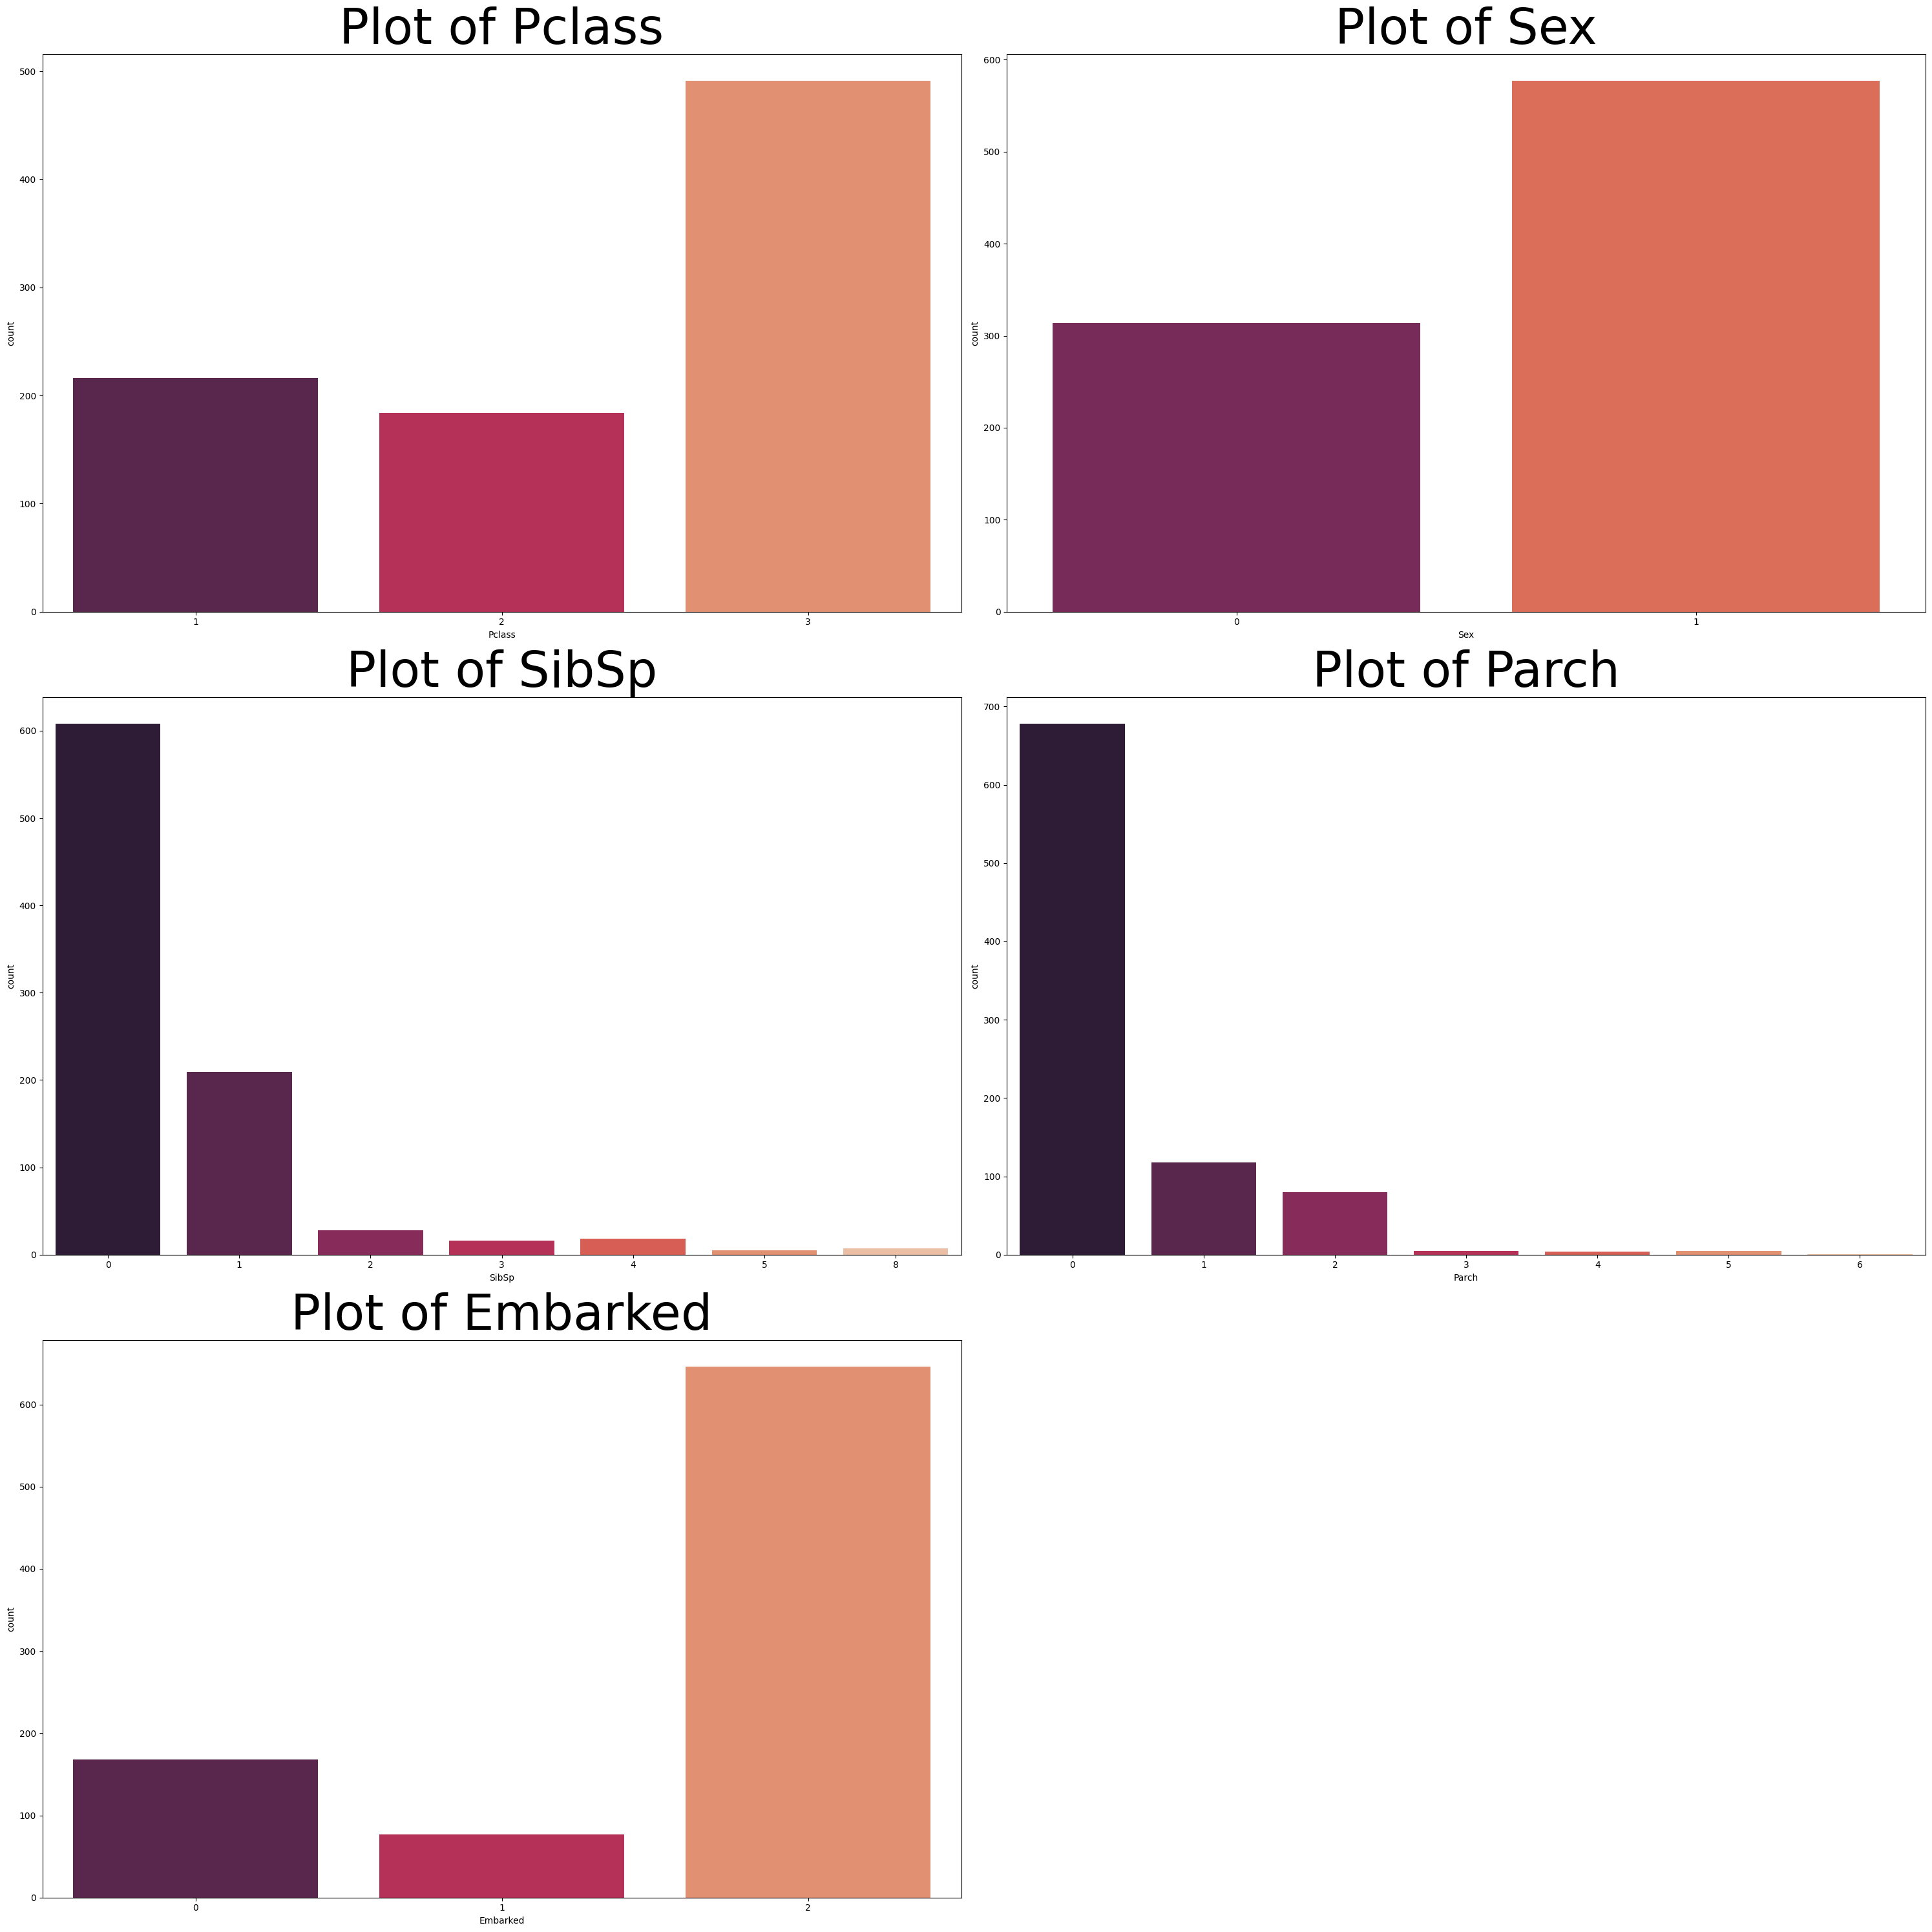

In [24]:
plt.figure(figsize=(30, 30))
rows = (len(cat_col) + 1) // 2  
for i, c in enumerate(cat_col, 1):
    plt.subplot(rows, 2, i)  
    sns.countplot(data=train_df, x=c, palette='rocket')
    plt.title(f"Plot of {c}",fontsize=55)

plt.tight_layout()
plt.show()

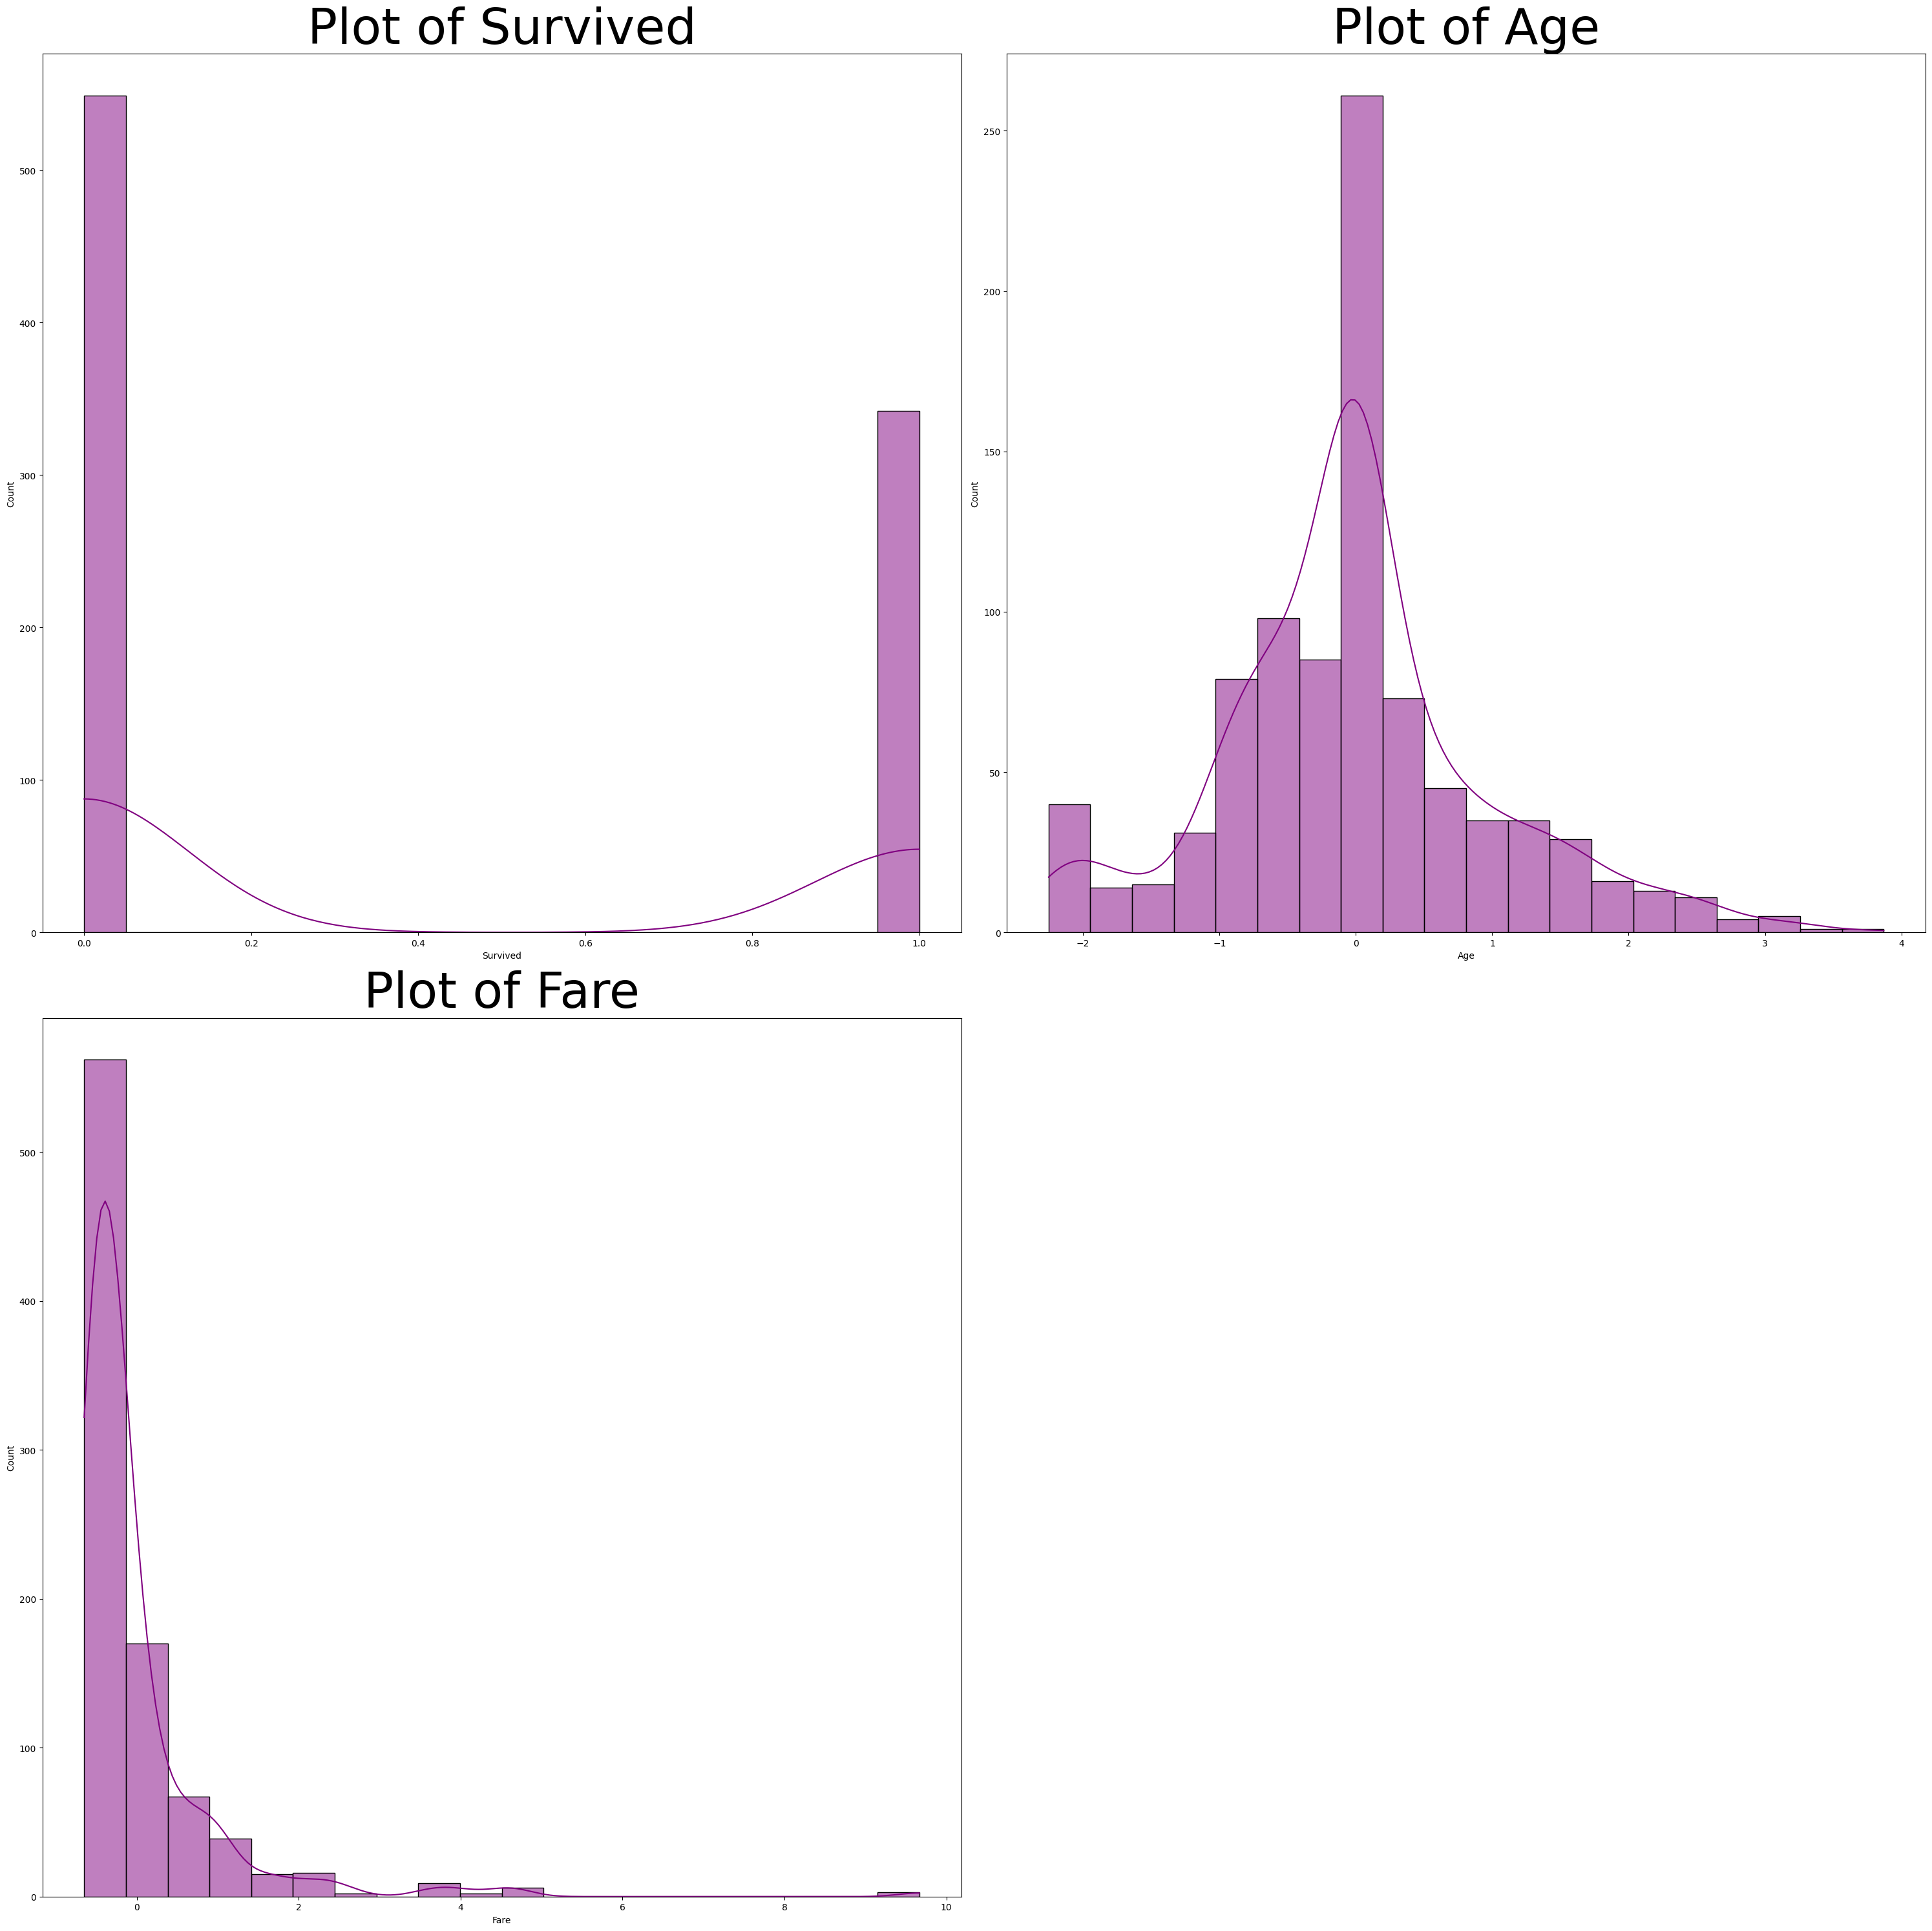

In [25]:
plt.figure(figsize=(30,30))
row = (len(num_col)+1)//2
for i, c in enumerate(num_col,1):
    plt.subplot(row,2,i)
    sns.histplot(data = train_df , x=c,bins=20,kde=True, color = 'purple'  )
    plt.title(f"Plot of {c}",fontsize=55)

plt.tight_layout()
plt.show()

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Bivariate Analysis👈</div>

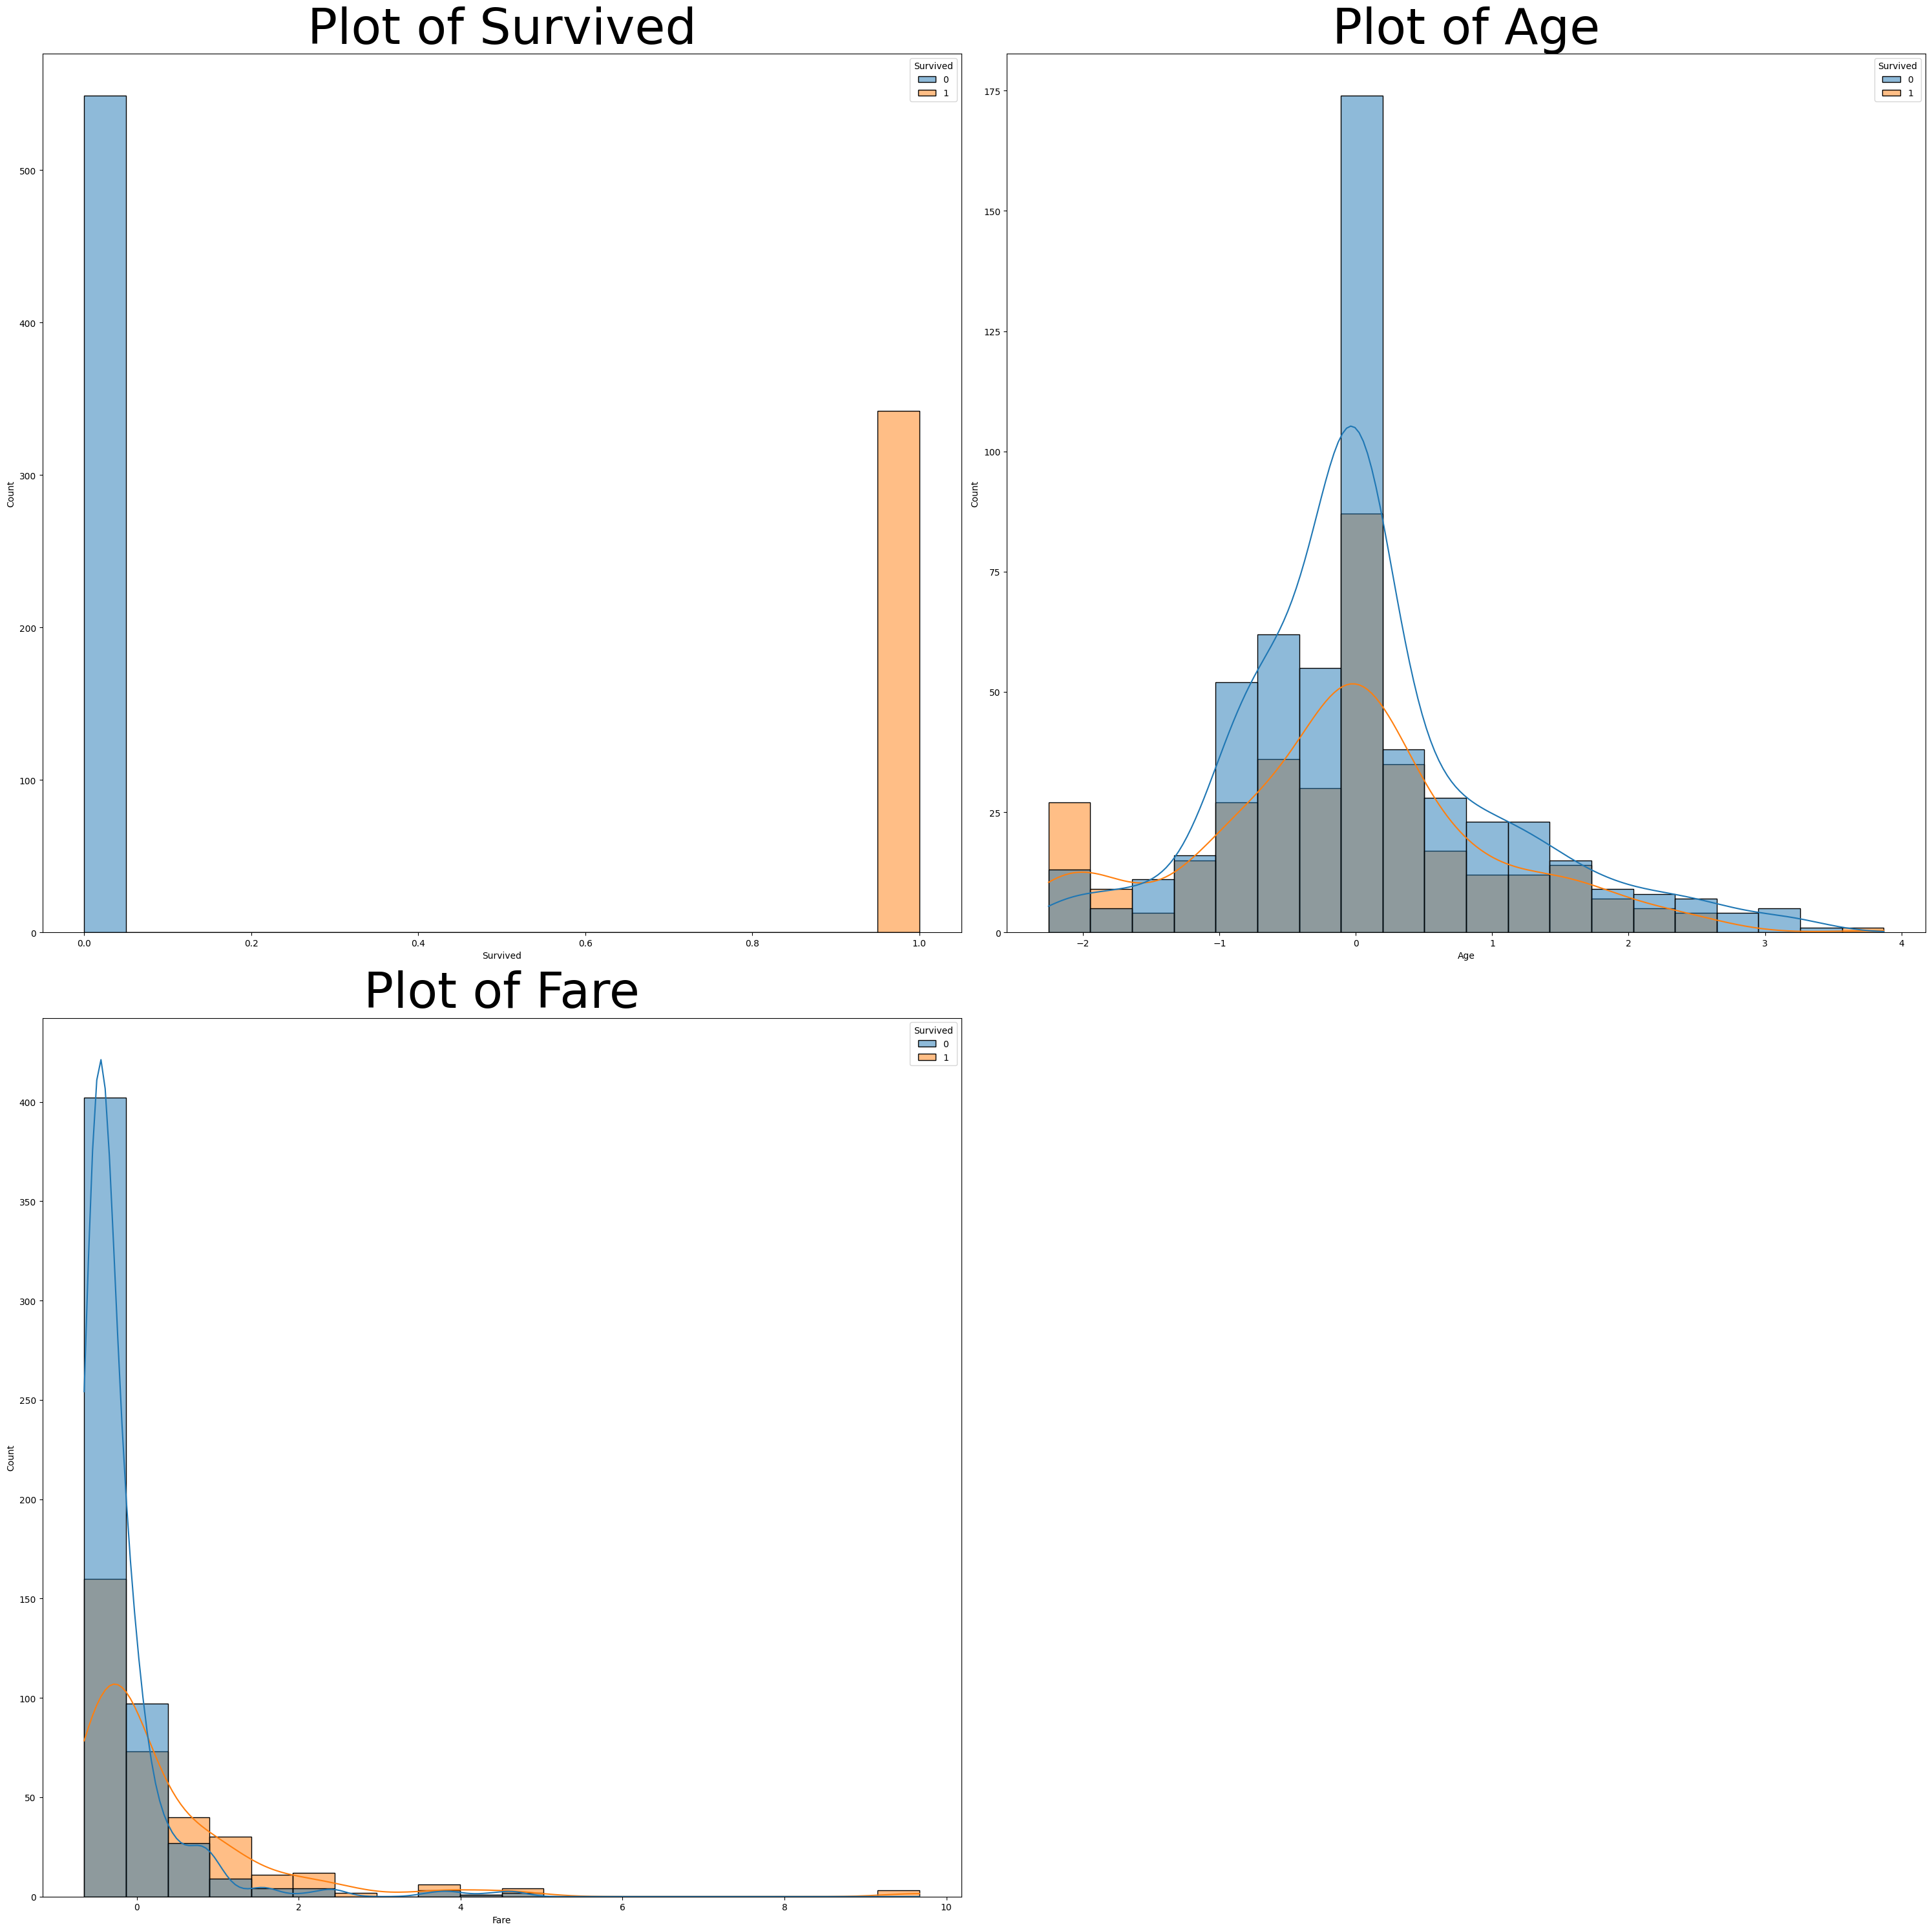

In [26]:
plt.figure(figsize=(30,30))
row = (len(num_col)+1)//2
for i, c in enumerate(num_col,1):
    plt.subplot(row,2,i)
    sns.histplot(data = train_df , x=c ,hue='Survived',bins=20,kde=True, color = 'purple'  )
    plt.title(f"Plot of {c}",fontsize=55)

plt.tight_layout()
plt.show()

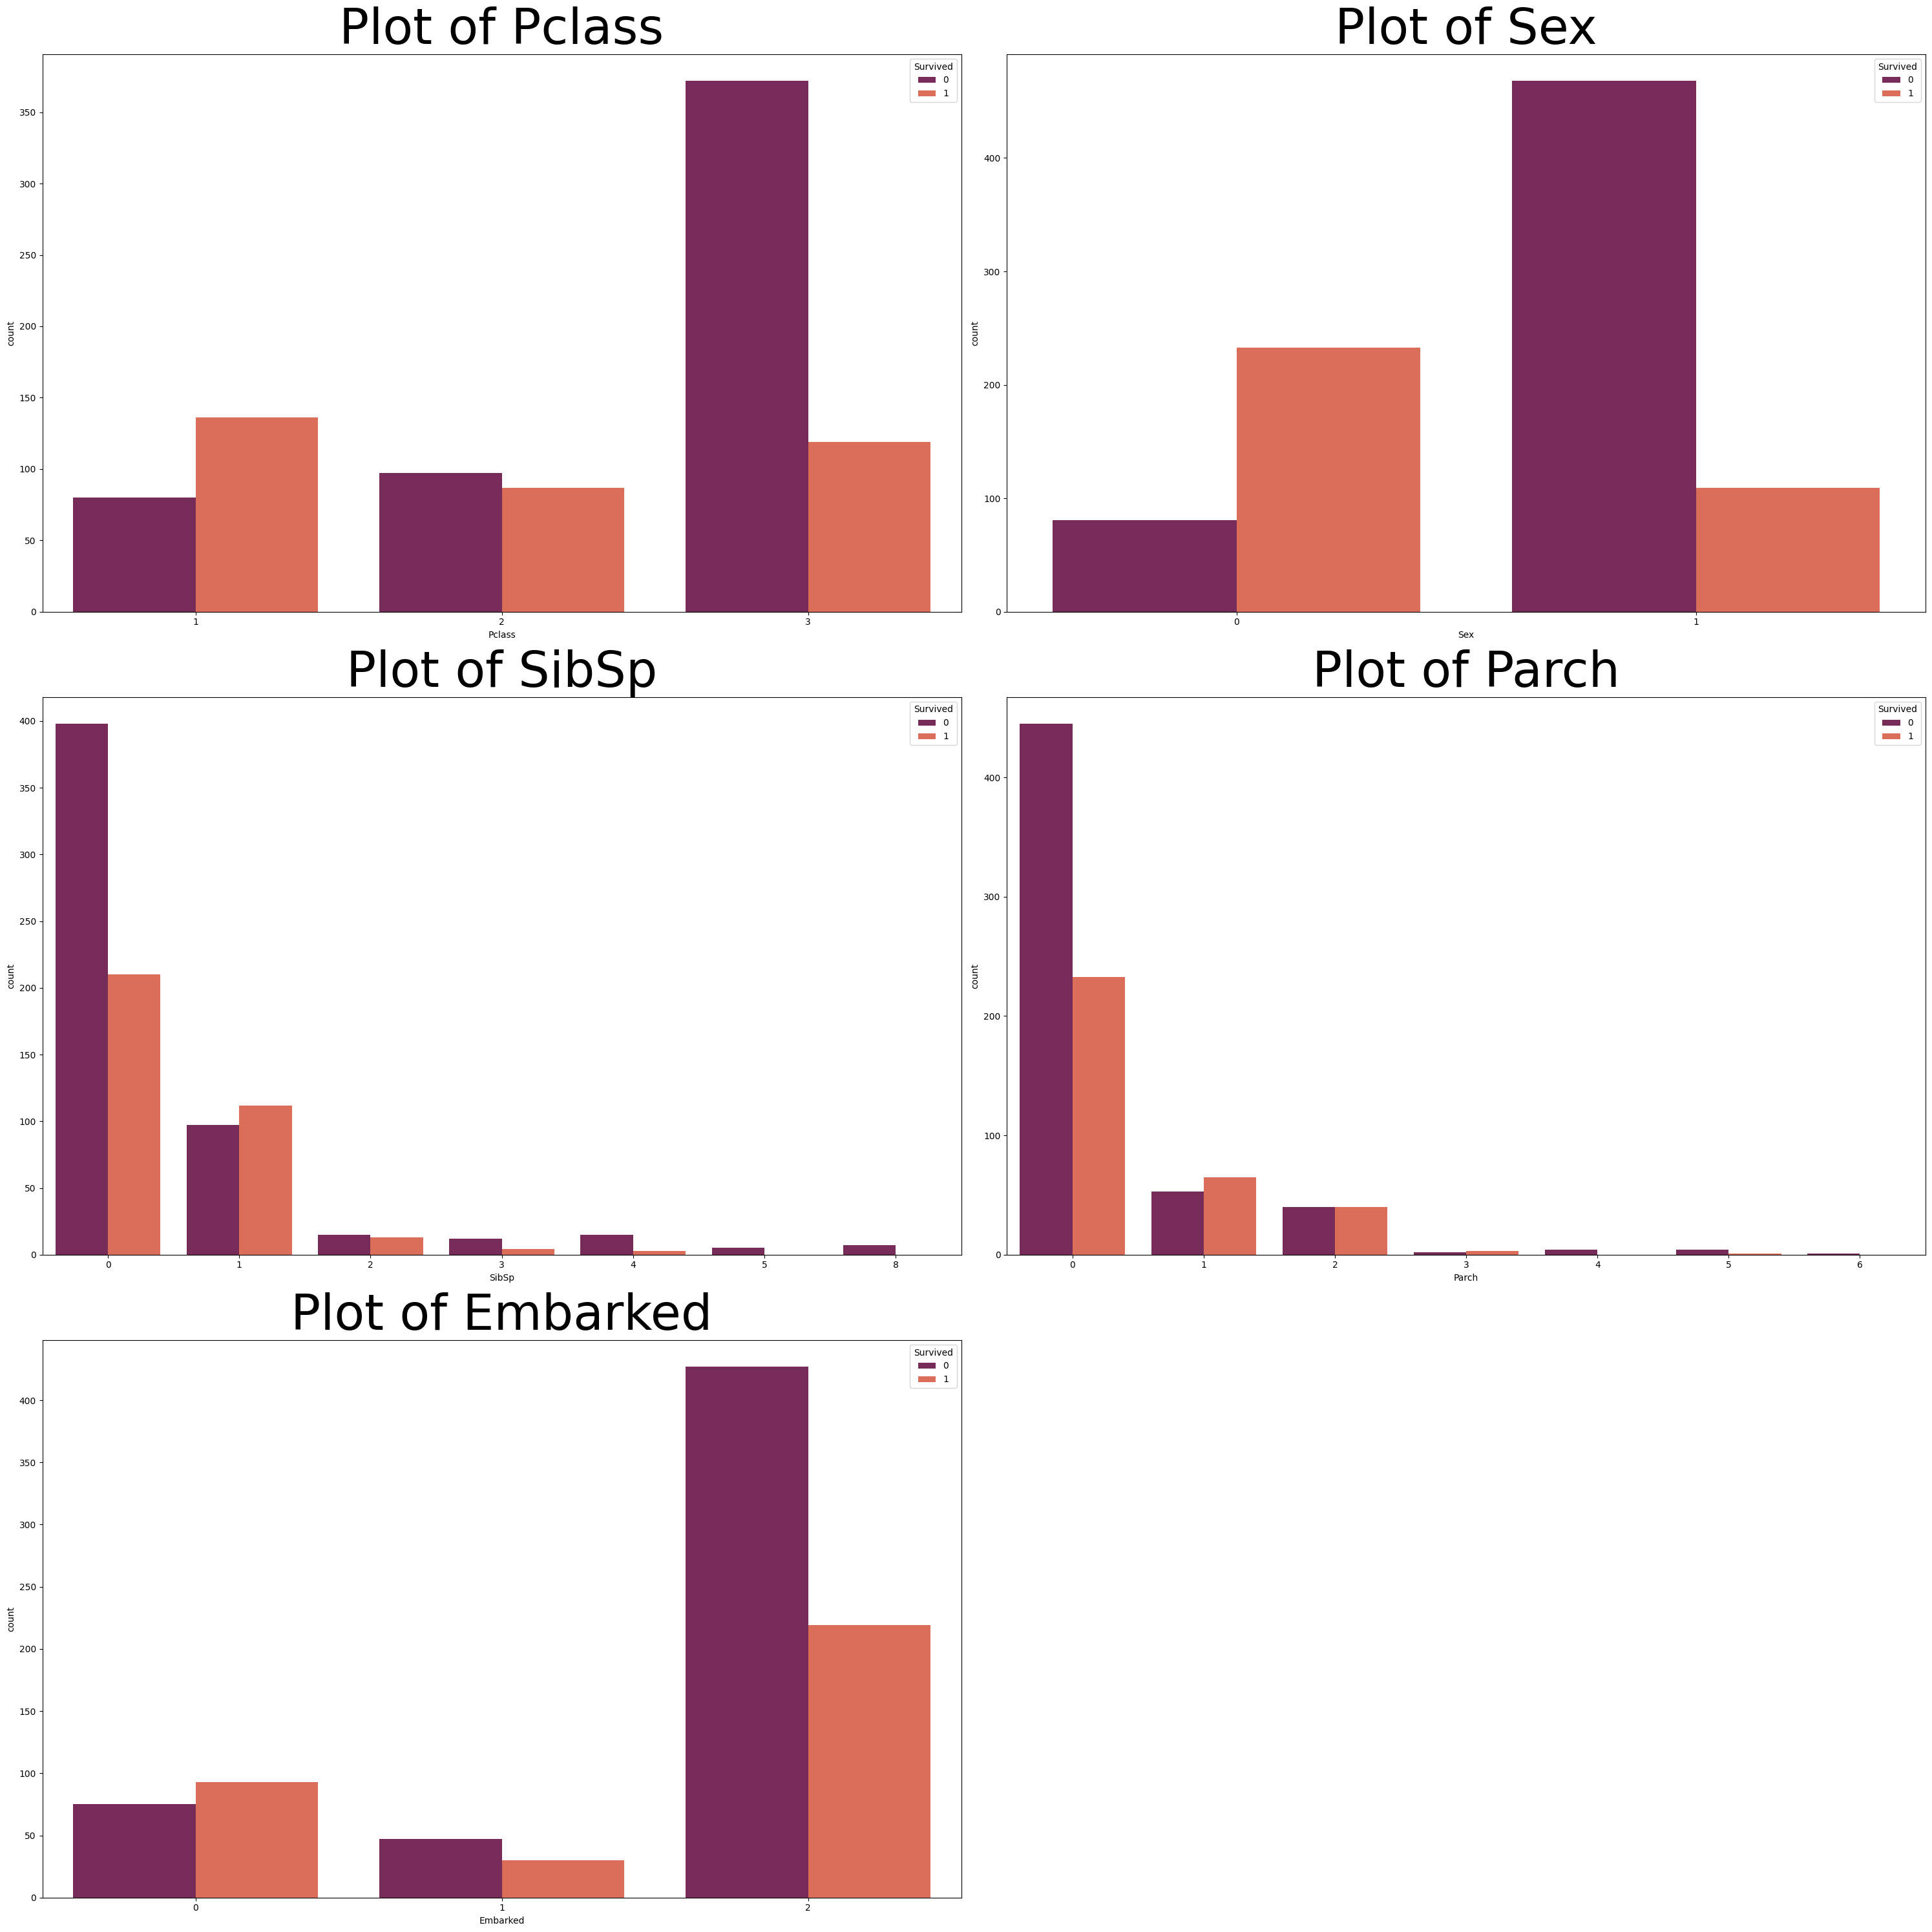

In [27]:
plt.figure(figsize=(30, 30))
rows = (len(cat_col) + 1) // 2  
for i, c in enumerate(cat_col, 1):
    plt.subplot(rows, 2, i)  
    sns.countplot(data=train_df, x=c, hue = 'Survived', palette='rocket')
    plt.title(f"Plot of {c}",fontsize=55)

plt.tight_layout()
plt.show()

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Correlation Analysis👈</div>

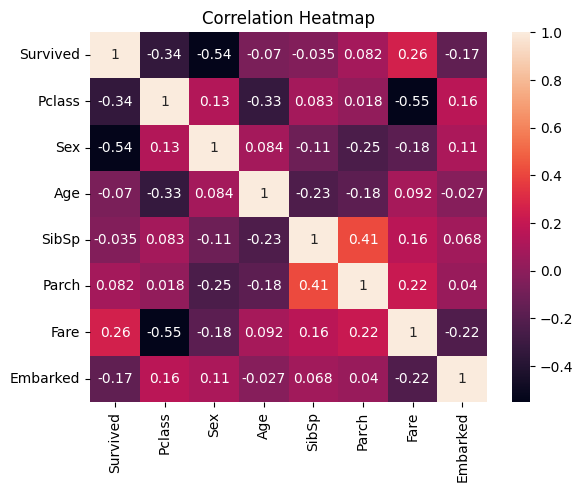

In [28]:
corr = train_df.corr();
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Outlier Detection👈</div>

Text(0.5, 1.0, 'Fare Outliers')

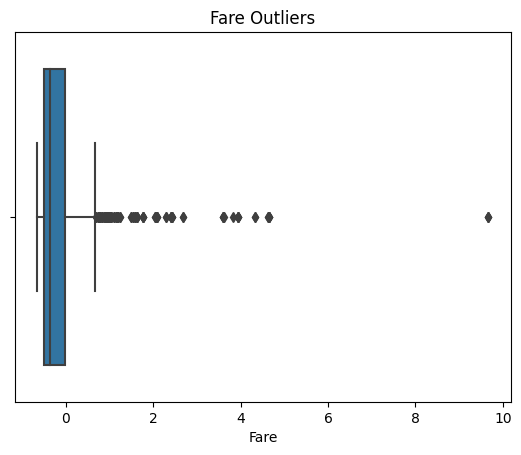

In [29]:
sns.boxplot(data = train_df, x='Fare')
plt.title("Fare Outliers")

In [30]:
q1=train_df['Fare'].quantile(0.25)
q3=train_df['Fare'].quantile(0.75)
iqr = q3-q1
lb= q1-(1.5*iqr)
ub= q3+(1.5*iqr)
train_df=train_df[(train_df['Fare']>=lb) & (train_df['Fare']<=ub)]

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Pair-Wise Plot👈</div>

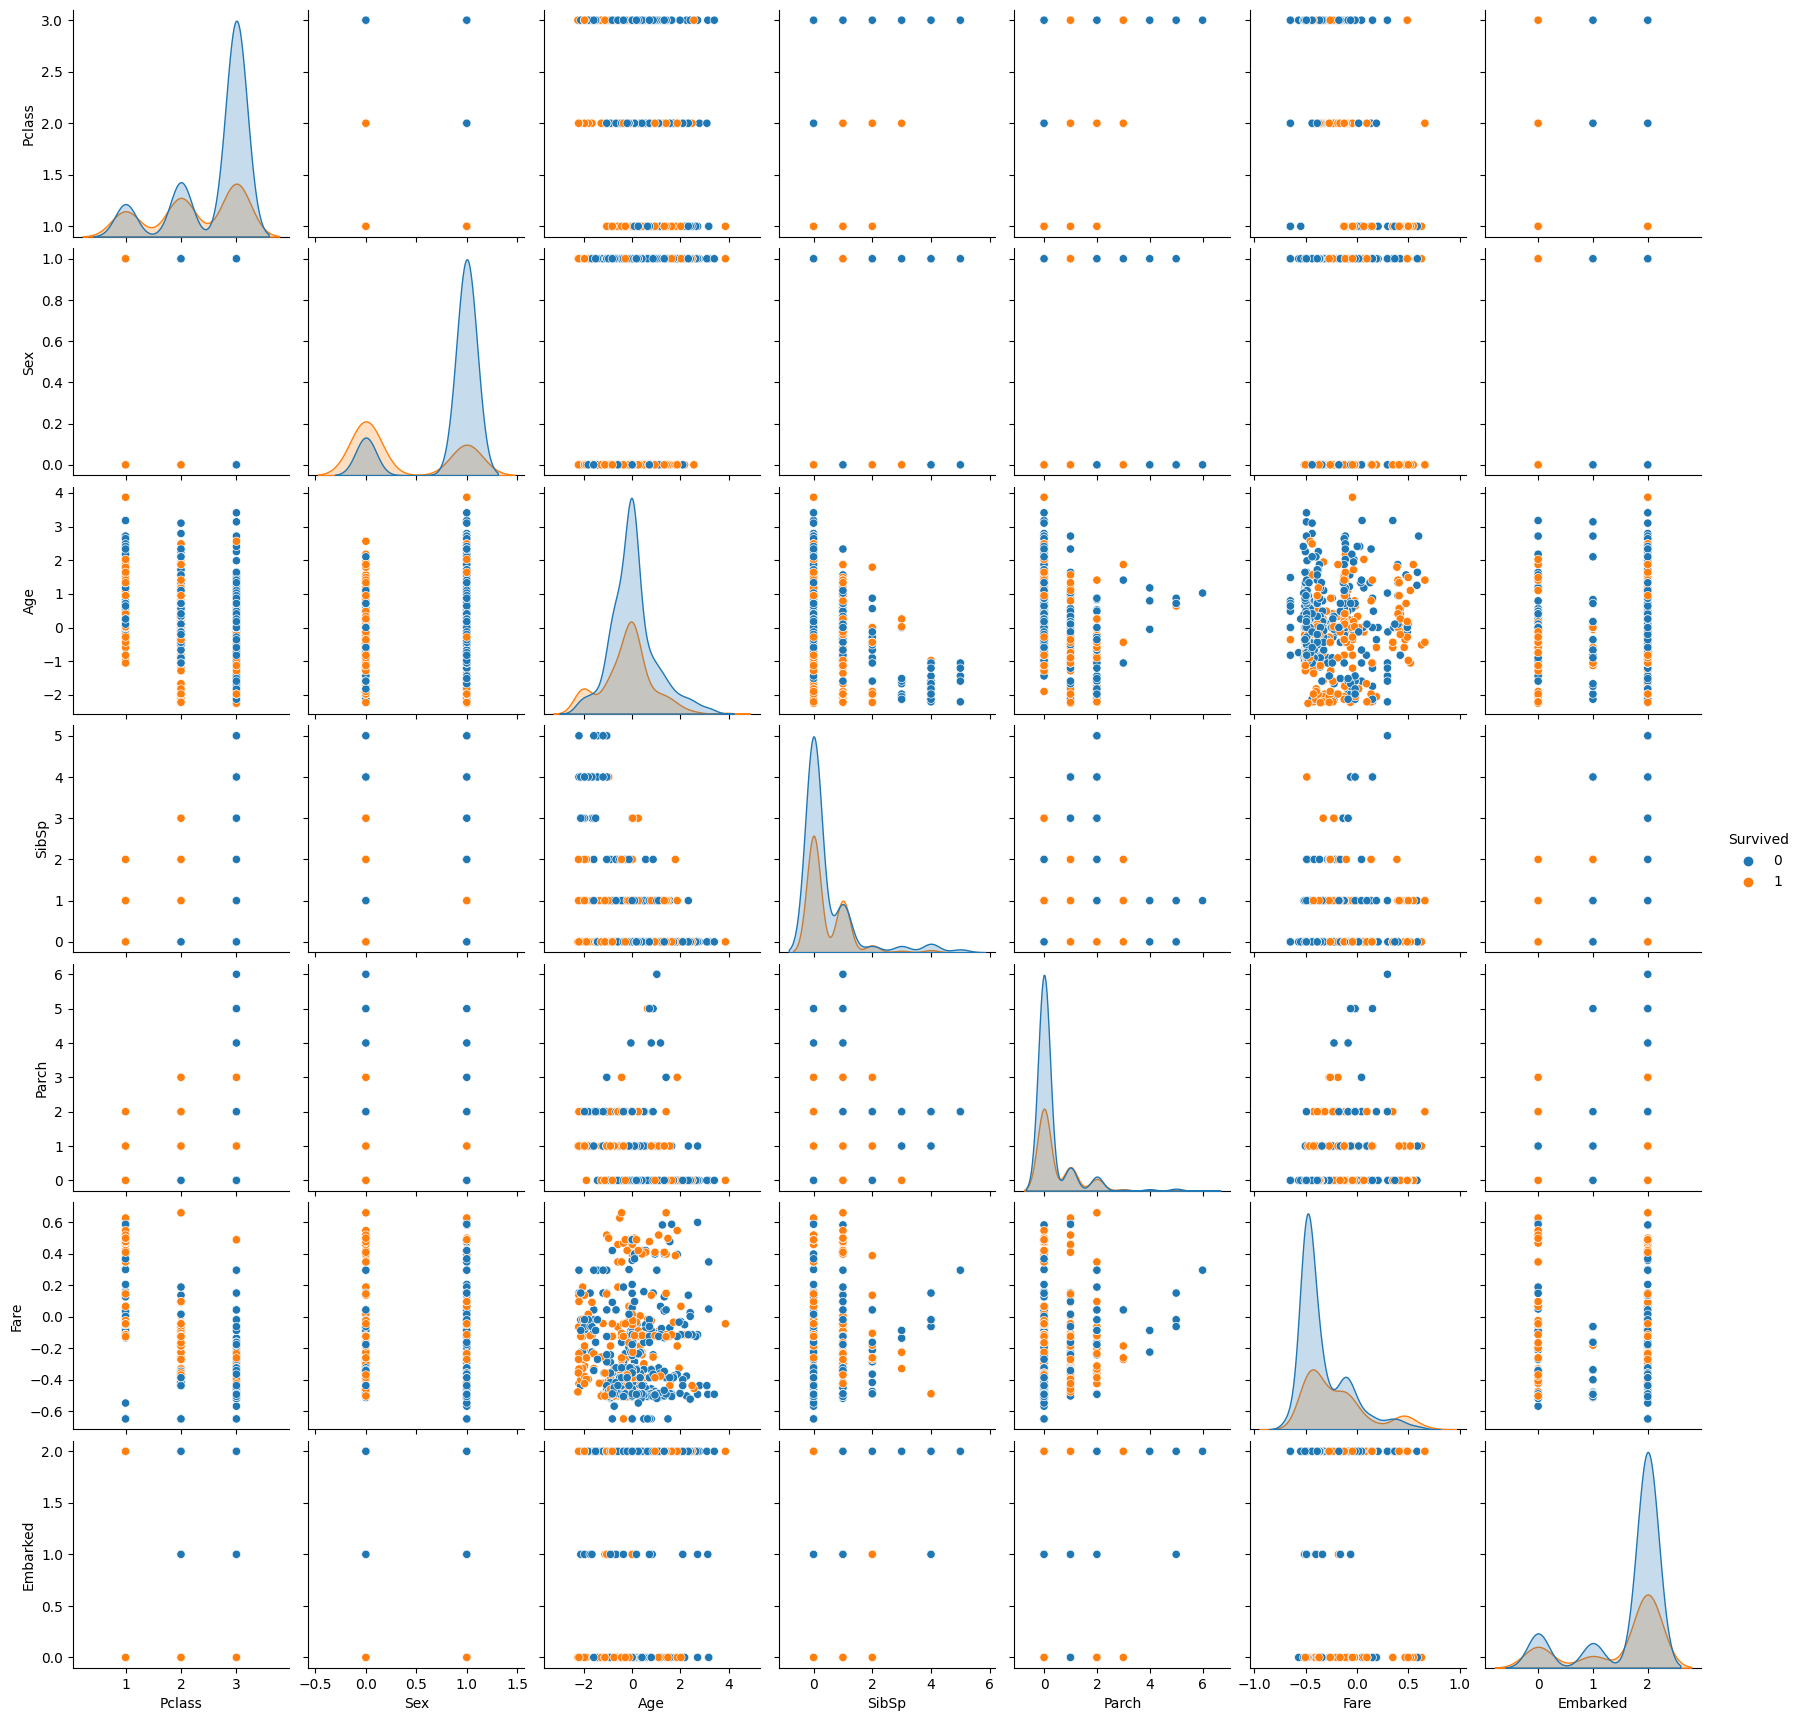

In [31]:
sns.pairplot(train_df, hue = 'Survived')

<a id="6"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">6. Data Spliting</div>

In [32]:
X= train_df.drop('Survived', axis =1)
y=train_df['Survived']

In [33]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

<a id="7"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">7. Model Building</div>

In [34]:
def modelling(y_train ,y_pred  , model):
    accuracy =accuracy_score(y_pred,y_test)
    precision =precision_score(y_pred,y_test)
    recall = recall_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test)
    ans = pd.DataFrame({"experiment_name": [name],  "accuracy": [accuracy],
         "precision": [precision], "recall": [recall], "f1": [f1]})
    return ans

In [35]:
def cm(y_test, y_pred,model ):
    con_mat=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(con_mat,annot=True)
    plt.title(f"Confusion Matrix of {model}")
    plt.xlabel('Prediction')
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [36]:
model_df = pd.DataFrame({"experiment_name": [],  "accuracy": [],
         "precision": [], "recall": [], "f1": []})
model_df

,experiment_name,accuracy,precision,recall,f1


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Logistic Regression👈</div>

In [37]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
accuracy1 =accuracy_score(y_pred1,y_test)
precision1 =precision_score(y_pred1,y_test)
recall1 = recall_score(y_pred1,y_test)
f1_1 = f1_score(y_pred1,y_test)
ans = pd.DataFrame({"experiment_name": 'Logistic Regression',  "accuracy": [accuracy1],
     "precision": [precision1], "recall": [recall1], "f1": [f1_1]})
ans


,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Knn👈</div>

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred7 = knn.predict(X_test)
accuracy7=accuracy_score(y_pred7,y_test)
precision7 =precision_score(y_pred7,y_test)
recall7 = recall_score(y_pred7,y_test)
f1_7 = f1_score(y_pred7,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'K Neighest Neighbors ',  "accuracy": [accuracy7],
     "precision": [precision7], "recall": [recall7], "f1": [f1_7]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉KNN After Bagging👈</div>

In [40]:
bg_knn = BaggingClassifier(estimator=knn, n_estimators=500, random_state=42)
bg_knn.fit(X_train, y_train)


BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=500,
                  random_state=42)

In [41]:
y_pred8 = bg_knn.predict(X_test)
accuracy8 =accuracy_score(y_pred8,y_test)
precision8 =precision_score(y_pred8,y_test)
recall8 = recall_score(y_pred8,y_test)
f1_8 = f1_score(y_pred8,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Knn After Bagging',  "accuracy": [accuracy8],
     "precision": [precision8], "recall": [recall8], "f1": [f1_8]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Decision Tree👈</div>

In [42]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [43]:
y_pred2 = dt.predict(X_test)
accuracy2 =accuracy_score(y_pred2,y_test)
precision2 =precision_score(y_pred2,y_test)
recall2 = recall_score(y_pred2,y_test)
f1_2 = f1_score(y_pred2,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Decision Tree',  "accuracy": [accuracy2],
     "precision": [precision2], "recall": [recall2], "f1": [f1_2]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Decision Tree After Bagging👈</div>

In [44]:
bg_dt = BaggingClassifier(estimator=dt, n_estimators=500, random_state=42)
bg_dt.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=42)

In [45]:
y_pred4 = bg_dt.predict(X_test)
accuracy4 =accuracy_score(y_pred4,y_test)
precision4 =precision_score(y_pred4,y_test)
recall4 = recall_score(y_pred4,y_test)
f1_4 = f1_score(y_pred4,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Decision Tree After Bagging',  "accuracy": [accuracy4],
     "precision": [precision4], "recall": [recall4], "f1": [f1_4]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Logistic Regression After Bagging👈</div>

In [46]:
bg = BaggingClassifier(estimator=lr, n_estimators=500, random_state=42)
bg.fit(X_train, y_train)


BaggingClassifier(estimator=LogisticRegression(), n_estimators=500,
                  random_state=42)

In [47]:
y_pred3 = bg.predict(X_test)
accuracy3 =accuracy_score(y_pred3,y_test)
precision3 =precision_score(y_pred3,y_test)
recall3 = recall_score(y_pred3,y_test)
f1_3 = f1_score(y_pred3,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Logistic Regression After Bagging',  "accuracy": [accuracy3],
     "precision": [precision3], "recall": [recall3], "f1": [f1_3]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Random Forest👈</div>

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
y_pred5 = rf.predict(X_test)
accuracy5 =accuracy_score(y_pred5,y_test)
precision5 =precision_score(y_pred5,y_test)
recall5 = recall_score(y_pred5,y_test)
f1_5 = f1_score(y_pred5,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Random forest',  "accuracy": [accuracy5],
     "precision": [precision5], "recall": [recall5], "f1": [f1_5]})])
ans


,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Random forest,0.761290,0.633333,0.716981,0.672566


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Random Forest After Bagging👈</div>

In [50]:
bg_rf = BaggingClassifier(estimator=rf, n_estimators=100, random_state=42)
bg_rf.fit(X_train, y_train)


BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [51]:
y_pred6 = bg_rf.predict(X_test)
accuracy6 =accuracy_score(y_pred6,y_test)
precision6 =precision_score(y_pred6,y_test)
recall6 = recall_score(y_pred6,y_test)
f1_6= f1_score(y_pred6,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Random forest After Bagging',  "accuracy": [accuracy6],
     "precision": [precision6], "recall": [recall6], "f1": [f1_6]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Support Vector Machine👈</div>

In [52]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train, y_train)


SVC()

In [53]:
y_pred9 = svm.predict(X_test)
accuracy9 =accuracy_score(y_pred9,y_test)
precision9 =precision_score(y_pred9,y_test)
recall9 = recall_score(y_pred9,y_test)
f1_9= f1_score(y_pred9,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'SVM',  "accuracy": [accuracy9],
     "precision": [precision9], "recall": [recall9], "f1": [f1_9]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,SVM,0.787097,0.650000,0.764706,0.702703


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉SVM  After Bagging👈</div>

In [54]:
bg_svm=  BaggingClassifier(estimator=svm, n_estimators=100, random_state=42)
bg_svm.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [55]:
y_pred10 = bg_svm.predict(X_test)
accuracy10 =accuracy_score(y_pred10,y_test)
precision10 =precision_score(y_pred10,y_test)
recall10 = recall_score(y_pred10,y_test)
f1_10= f1_score(y_pred10,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'SVM after bagging',  "accuracy": [accuracy10],
     "precision": [precision10], "recall": [recall10], "f1": [f1_10]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉XG Boost👈</div>

In [56]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred11 = xgb.predict(X_test)
accuracy11 =accuracy_score(y_pred11,y_test)
precision11 =precision_score(y_pred11,y_test)
recall11 = recall_score(y_pred11,y_test)
f1_11= f1_score(y_pred11,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'XGboost',  "accuracy": [accuracy11],
     "precision": [precision11], "recall": [recall11], "f1": [f1_11]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Gradient Boosting👈</div>

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
y_pred12 = gb.predict(X_test)
accuracy12 =accuracy_score(y_pred12,y_test)
precision12 =precision_score(y_pred12,y_test)
recall12 = recall_score(y_pred12,y_test)
f1_12= f1_score(y_pred12,y_test)
ans = pd.concat([ans , pd.DataFrame({"experiment_name": 'Gradient boosting',  "accuracy": [accuracy12],
     "precision": [precision12], "recall": [recall12], "f1": [f1_12]})])
ans

,experiment_name,accuracy,precision,recall,f1
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703


<a id="8"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">8. Model Evaluation</div>

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for Logistic Regression👈</div>

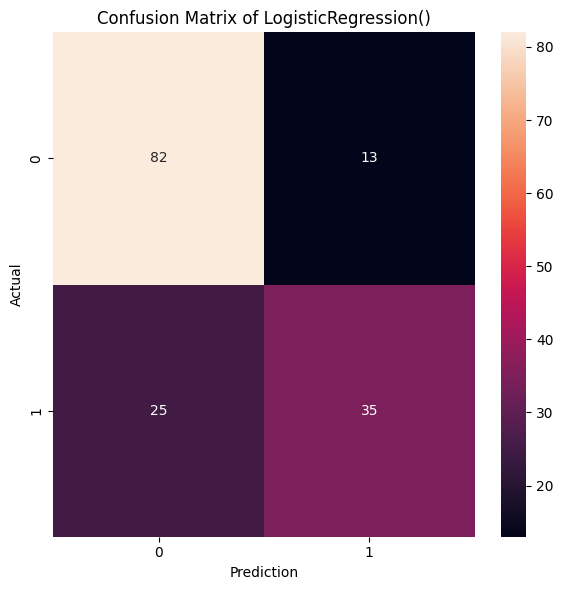

In [60]:
cm(y_test, y_pred1,lr )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for Logistic Regression After Bagging👈</div>

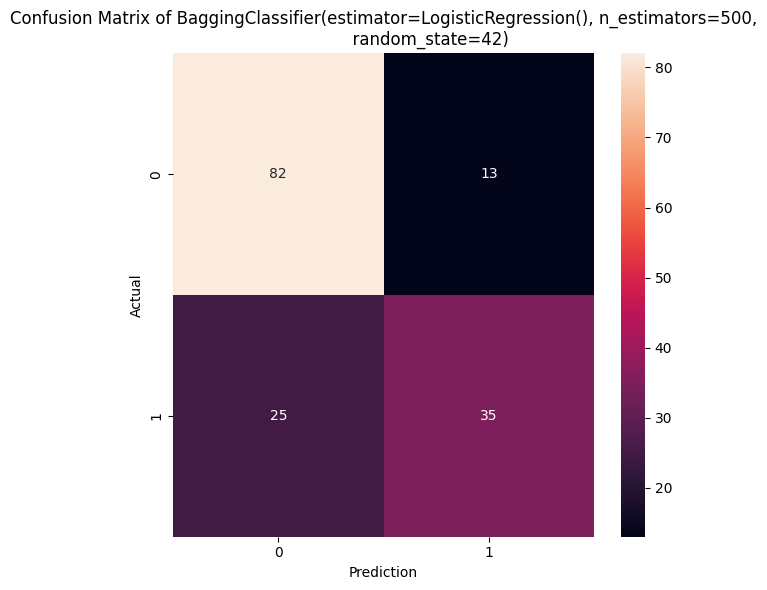

In [61]:
cm(y_test, y_pred3,bg )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrix for DecisionTree👈</div>

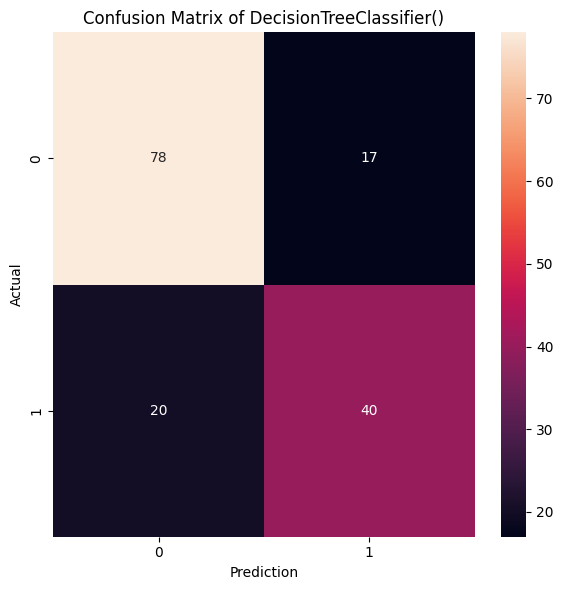

In [62]:
cm(y_test, y_pred2,dt )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for Decision Tree After Bagging👈</div>

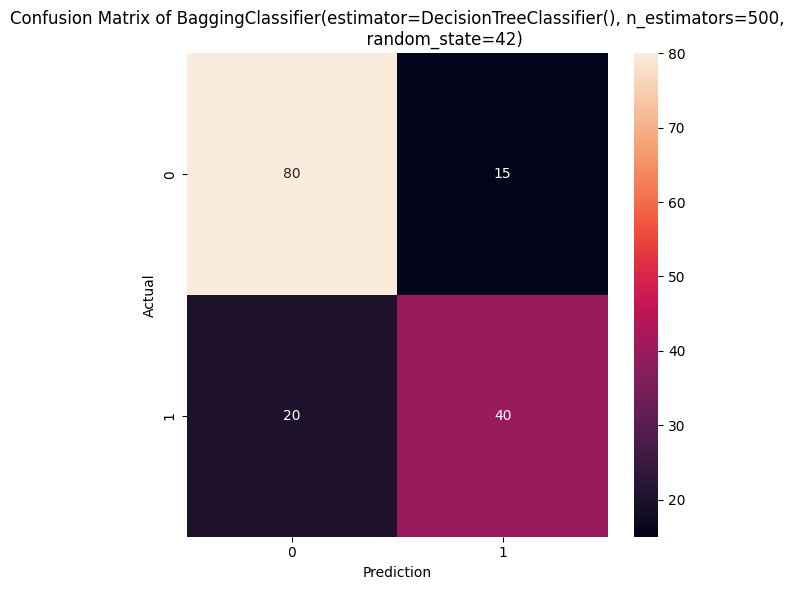

In [63]:
cm(y_test, y_pred4,bg_dt )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrix for Random Forest👈</div>

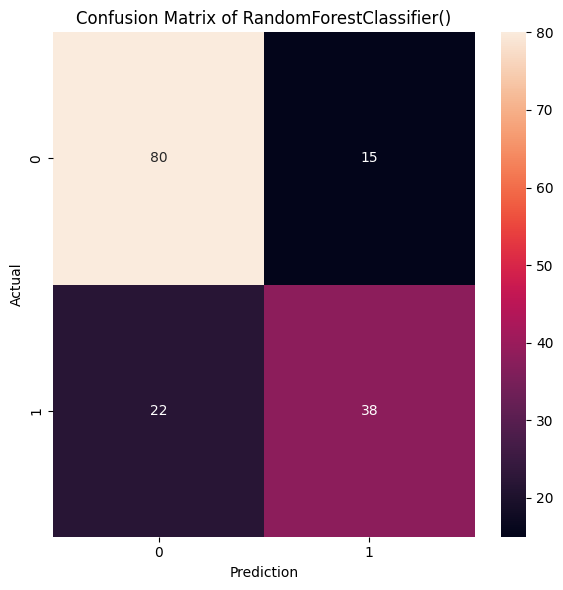

In [64]:
cm(y_test, y_pred5,rf )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrix for Random Forest After Bagging 👈</div>

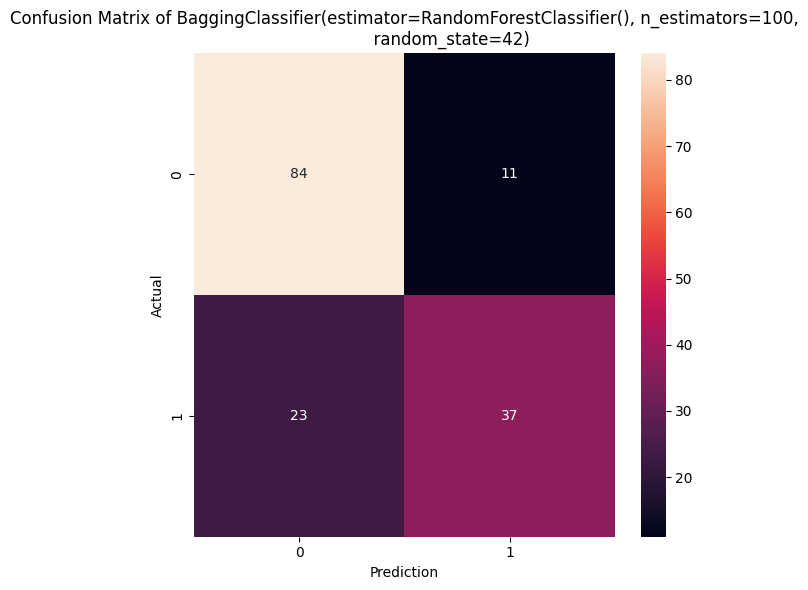

In [65]:
cm(y_test, y_pred6,bg_rf )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for KNN👈</div>

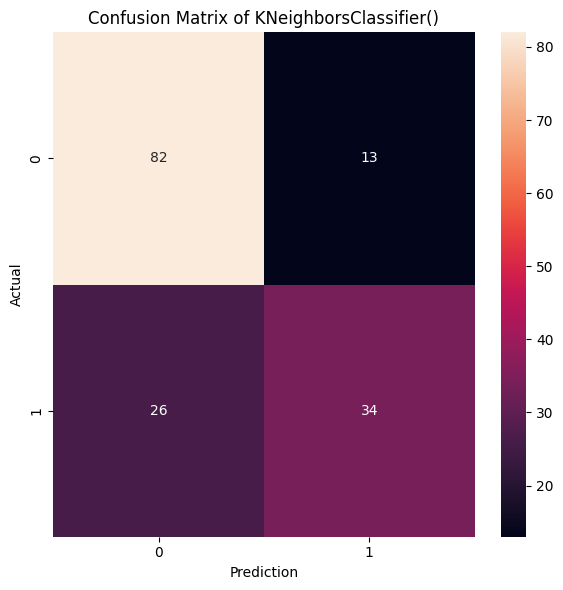

In [66]:
cm(y_test, y_pred7,knn )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for KNN after Bagging👈</div>

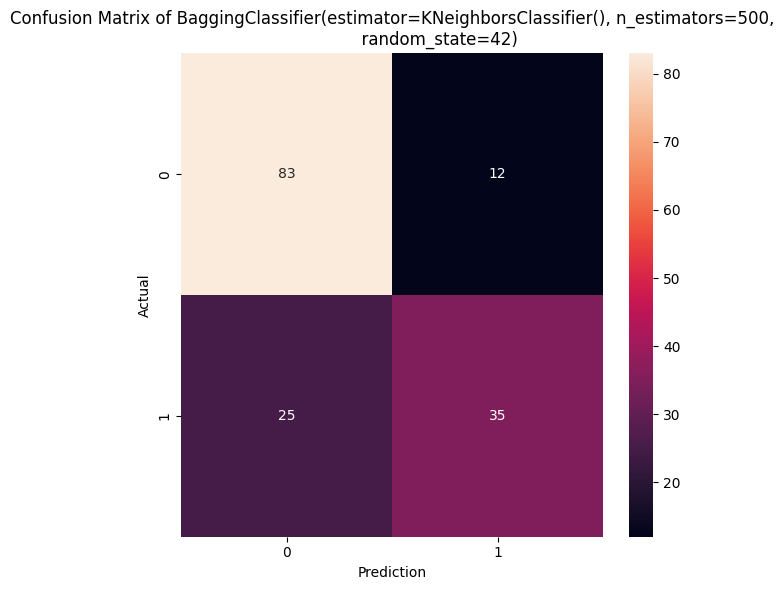

In [67]:
cm(y_test, y_pred8,bg_knn )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for SVM👈</div>

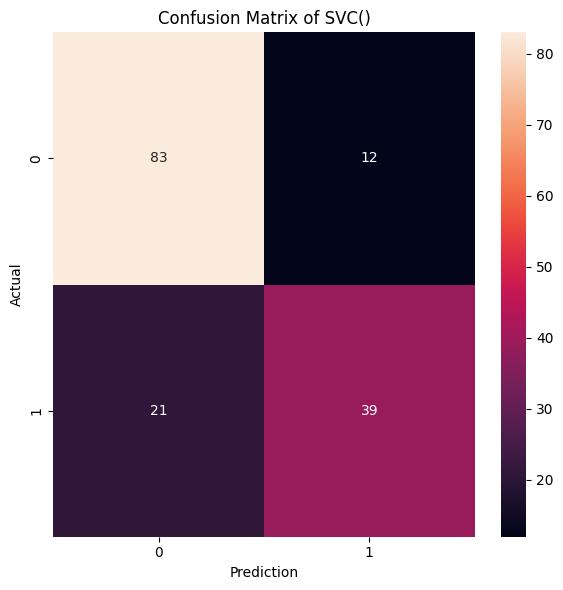

In [68]:
cm(y_test, y_pred9,svm )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for SVM after Bagging👈</div>

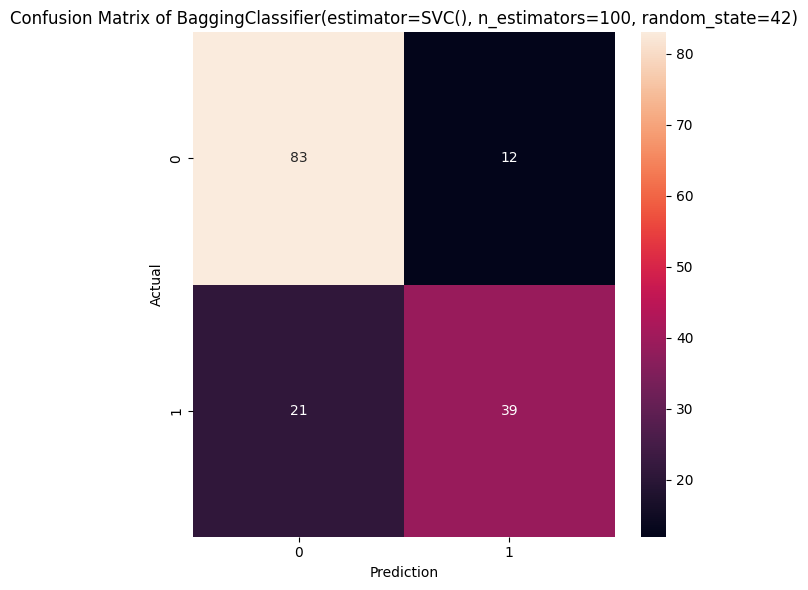

In [69]:
cm(y_test, y_pred10,bg_svm )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for XGboost👈</div>

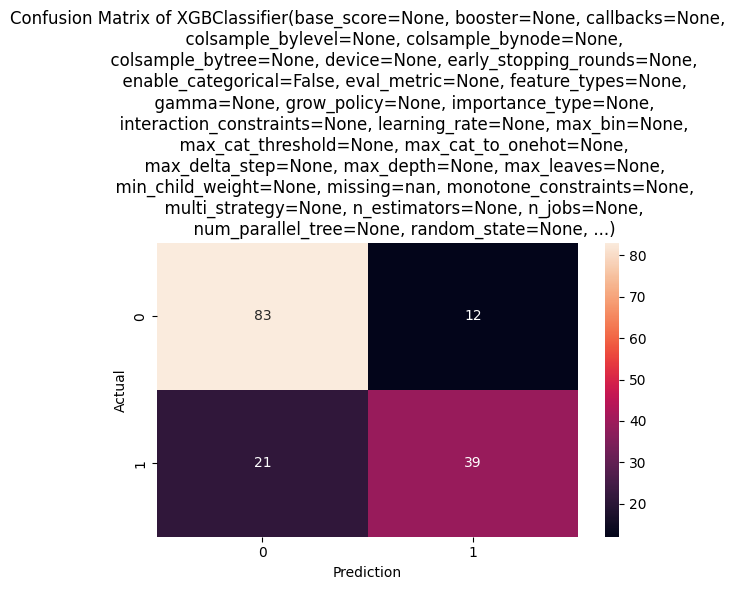

In [70]:
cm(y_test, y_pred11,xgb )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Confusion Matrrix for Gradient Boosting👈</div>

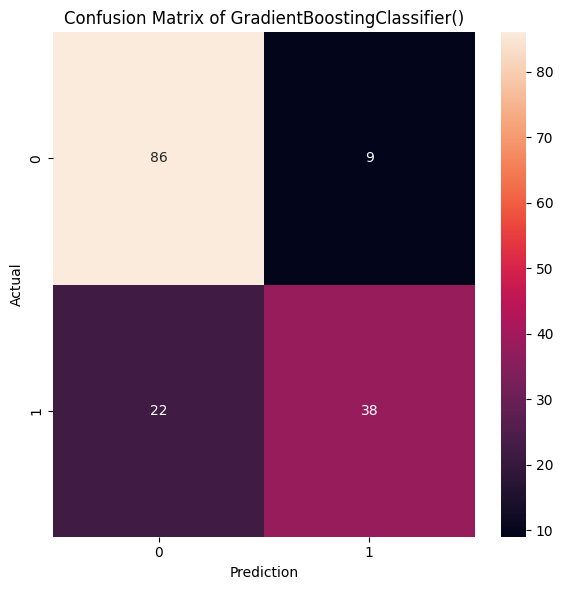

In [71]:
cm(y_test, y_pred12,gb )

## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Models Based on Accuracy👈</div>

In [72]:

models_accuracy = ans.sort_values(by='accuracy', ascending=False)
models_accuracy

,experiment_name,accuracy,precision,recall,f1
0,Gradient boosting,0.800000,0.633333,0.808511,0.710280
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703
0,XGboost,0.787097,0.650000,0.764706,0.702703
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Models Based on Precision👈</div>

In [73]:
models_accuracy = ans.sort_values(by='precision', ascending=False)
models_accuracy

,experiment_name,accuracy,precision,recall,f1
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703
0,XGboost,0.787097,0.650000,0.764706,0.702703
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Gradient boosting,0.800000,0.633333,0.808511,0.710280
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Models Based on Recall👈</div>

In [74]:

models_accuracy = ans.sort_values(by='recall', ascending=False)
models_accuracy

,experiment_name,accuracy,precision,recall,f1
0,Gradient boosting,0.800000,0.633333,0.808511,0.710280
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703
0,XGboost,0.787097,0.650000,0.764706,0.702703
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148
0,Logistic Regression After Bagging,0.754839,0.583333,0.729167,0.648148
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,K Neighest Neighbors,0.748387,0.566667,0.723404,0.635514


## <div style="text-align: center; background: #7C00FE; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">👉Models Based on f1_Score👈</div>

In [75]:

models_accuracy = ans.sort_values(by='f1', ascending=False)
models_accuracy

,experiment_name,accuracy,precision,recall,f1
0,Gradient boosting,0.800000,0.633333,0.808511,0.710280
0,SVM,0.787097,0.650000,0.764706,0.702703
0,SVM after bagging,0.787097,0.650000,0.764706,0.702703
0,XGboost,0.787097,0.650000,0.764706,0.702703
0,Decision Tree After Bagging,0.774194,0.666667,0.727273,0.695652
0,Random forest After Bagging,0.780645,0.616667,0.770833,0.685185
0,Decision Tree,0.761290,0.666667,0.701754,0.683761
0,Random forest,0.761290,0.633333,0.716981,0.672566
0,Knn After Bagging,0.761290,0.583333,0.744681,0.654206
0,Logistic Regression,0.754839,0.583333,0.729167,0.648148


<a id="9"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">9. Model Submission</div>

In [76]:
save_model = "Saved_Model"
os.makedirs(save_model , exist_ok=True)

joblib.dump(lr , os.path.join(save_model, "Logistic_Regression.pkl"))
joblib.dump(knn , os.path.join(save_model, "KNN.pkl"))
joblib.dump(bg_knn , os.path.join(save_model, "KNN_bagging.pkl"))
joblib.dump(dt , os.path.join(save_model, "Decision_tree.pkl"))
joblib.dump(bg_dt , os.path.join(save_model, "Decision_tree_bagging.pkl"))
joblib.dump(rf , os.path.join(save_model, "Random_Forest.pkl"))
joblib.dump(bg_rf , os.path.join(save_model, "Random_Forest_bagging.pkl"))
joblib.dump(svm , os.path.join(save_model, "SVM.pkl"))
joblib.dump(bg_svm , os.path.join(save_model, "SVM_bagging.pkl"))
joblib.dump(xgb , os.path.join(save_model, "XGboost.pkl"))
joblib.dump(gb , os.path.join(save_model, "Gradient boosting.pkl"))


['Saved_Model/Gradient boosting.pkl']

In [77]:
output1= pd.DataFrame(test_df['PassengerId'])
output2= pd.DataFrame(test_df['PassengerId'])
output3= pd.DataFrame(test_df['PassengerId'])
output4= pd.DataFrame(test_df['PassengerId'])
output5= pd.DataFrame(test_df['PassengerId'])
output6= pd.DataFrame(test_df['PassengerId'])
output7= pd.DataFrame(test_df['PassengerId'])
output8= pd.DataFrame(test_df['PassengerId'])
output9= pd.DataFrame(test_df['PassengerId'])
output10= pd.DataFrame(test_df['PassengerId'])
output11= pd.DataFrame(test_df['PassengerId'])

lr_output = lr.predict(test_df.iloc[:, 1:])
dt_output =dt.predict(test_df.iloc[:, 1:])
bg_dt_output = bg_dt.predict(test_df.iloc[:, 1:])
rf_output = rf.predict(test_df.iloc[:, 1:])
bg_rf_output = bg_rf.predict(test_df.iloc[:, 1:])
knn_output = rf.predict(test_df.iloc[:, 1:])
bg_knn_output = bg_rf.predict(test_df.iloc[:, 1:])
svm_output = svm.predict(test_df.iloc[:, 1:])
bg_svm_output = bg_svm.predict(test_df.iloc[:, 1:])
xgb_output = xgb.predict(test_df.iloc[:, 1:])
gb_output = gb.predict(test_df.iloc[:, 1:])


output1['Survived']= lr_output
output1[['PassengerId', 'Survived']].to_csv("Submission_by_LogisticRegression.csv", index = None)

output6['Survived']= knn_output
output6[['PassengerId', 'Survived']].to_csv("Submission_by_KNN.csv", index = None)

output7['Survived']= bg_knn_output
output7[['PassengerId', 'Survived']].to_csv("Submission_by_Knn_Bagging.csv", index = None)

output8['Survived']= svm_output
output8[['PassengerId', 'Survived']].to_csv("Submission_by_SVM.csv", index = None)

output9['Survived']= bg_svm_output
output9[['PassengerId', 'Survived']].to_csv("Submission_by_SVM_Bagging.csv", index = None)

output2['Survived']= dt_output
output2[['PassengerId', 'Survived']].to_csv("Submission_by_Decisiontree.csv", index = None)

output3['Survived']= bg_dt_output
output3[['PassengerId', 'Survived']].to_csv("Submission_by_bagging_decisionTree.csv", index = None)

output4['Survived']= rf_output
output4[['PassengerId', 'Survived']].to_csv("Submission_by_RandomForest.csv", index = None)

output5['Survived']= bg_rf_output
output5[['PassengerId', 'Survived']].to_csv("Submission_by_bagging_RandomForest.csv", index = None)

output10['Survived']= xgb_output
output10[['PassengerId', 'Survived']].to_csv("Submission_by_XGboost.csv", index = None)

output11['Survived']= gb_output
output11[['PassengerId', 'Survived']].to_csv("Submission_by_Gradient_boosting.csv", index = None)



<a id="10"></a>
# <div style="text-align: center; background: #F5004F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.1; border-radius: 70% 70% 70% 70%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">10. Conclusion</div>

<span style="font-size: 15px; font-family: Verdana; border: 2px solid #ccc;; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
  <strong>Thank you for exploring this notebook! 🚀</strong> 
    In this journey through the Titanic Dataset, we tackled :
<br>
<br> 🧩Data Understanding and Preprocessing 
<br> 🔍Exploratory Data Analysis (EDA) 
<br>🔮Handling Missing Data 
<br>🧠Model Building and Evaluation 
<br>
<br>🌟This notebook is designed to be both educational and practical. I hope you found the insights and techniques useful for your machine learning journey! 
</span>


<a id="11"></a>
# <div style="text-align: center; background: #640D5F; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1.5; border-radius: 50% 50% 50% 50%  / 100px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">✨Author's Message✨</div>

<div style="background-color:white;font-size:15px;font-family:Verdana;border-style: solid;border-color: #563A9C;border-width:4px;padding:10px;margin: 1px;color:black;overflow:hidden"> 

<strong>💡 Thank you for exploring this notebook!</strong> 💬 I truly appreciate your time and interest. If you found this notebook insightful or helpful, your feedback means the world to me! 🚀

<strong>💬 Have suggestions, questions, or insights?</strong>
Feel free to share them in the comments below! I’m always eager to hear your thoughts and learn from the amazing Kaggle community. Together, we can refine this analysis and uncover new possibilities.

<strong>👍 If you enjoyed this notebook, a simple upvote goes a long way.</strong> It not only motivates me but also helps others in the Kaggle community discover valuable content.

✨ <strong>Let’s keep learning and innovating!</strong>
Wishing you the best on your data science journey. Thank you for being part of this community, and happy Kaggling!
    
